In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
cp = pd.read_csv("cp.csv")

In [3]:
cp.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### N-Nitrogen ratio in soil
#### P-Phosphorous ratio in soil
#### K-Potassium ratio in soil
#### temperature in celsius
#### humidity in %
#### ph value in soil
#### rainfall in mm
#### label value as per the prediction

In [29]:
cp['ph'].value_counts()

ph
6.502985    1
6.640471    1
6.251420    1
6.274453    1
6.135996    1
           ..
7.538631    1
7.127064    1
6.628265    1
6.726469    1
6.779833    1
Name: count, Length: 2200, dtype: int64

In [5]:
x=cp.drop('label', axis=1)
y=cp['label']

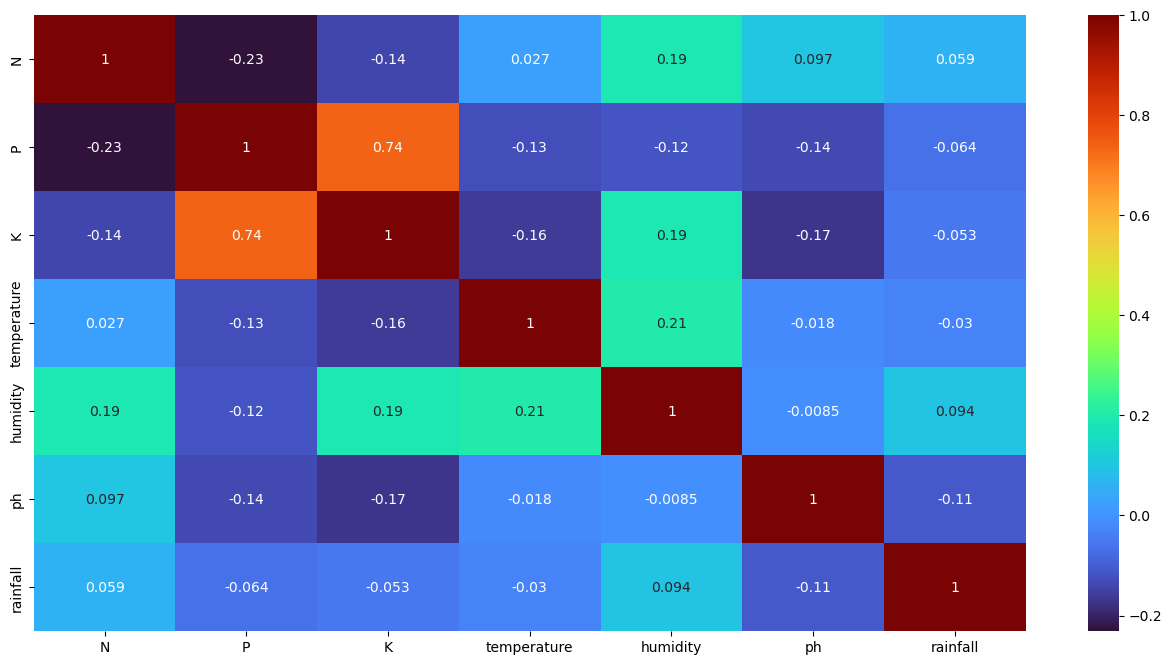

In [6]:
plt.figure(figsize=(16, 8))
sb.heatmap(x.corr(), annot=True, cmap='turbo')
plt.show()

<Figure size 1600x800 with 0 Axes>

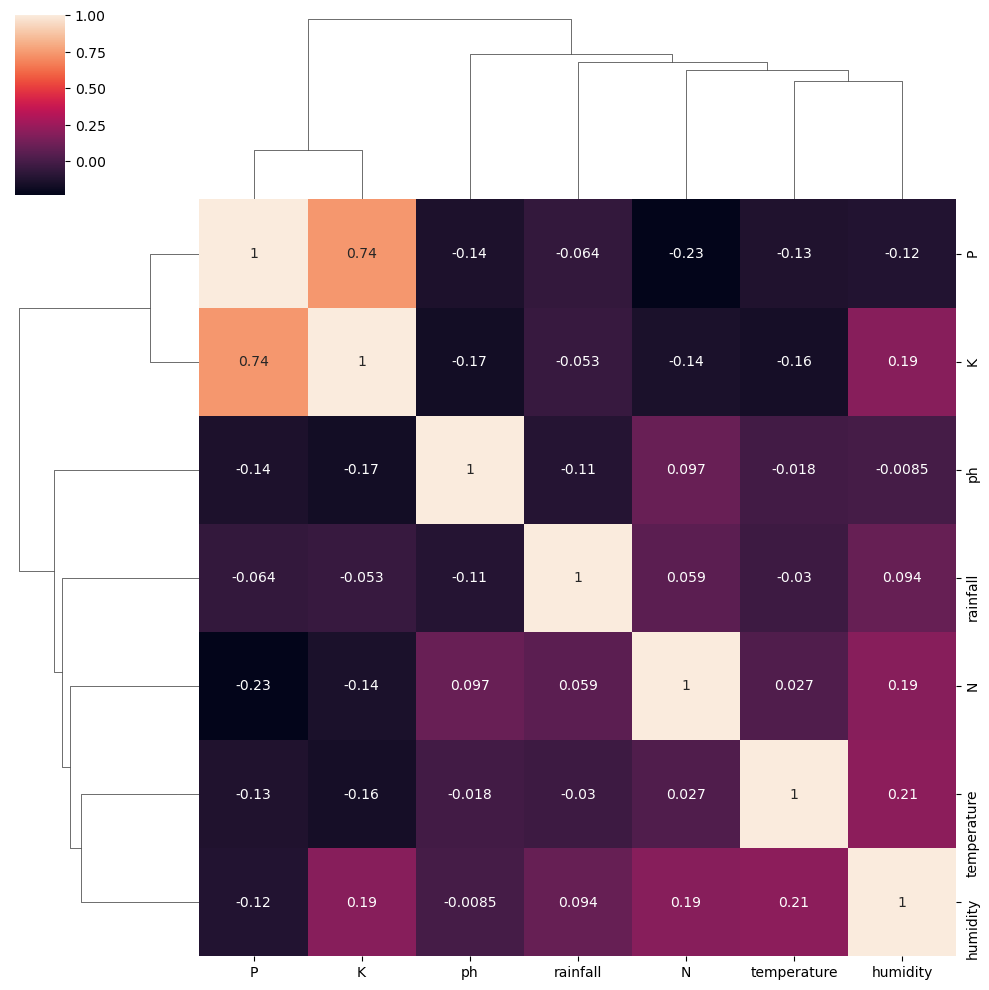

In [7]:
plt.figure(figsize=(16, 8))
sb.clustermap(x.corr(), annot=True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [11]:
log_clf=LogisticRegression()
log_clf.fit(x_train, y_train)
svm_clf=SVC()
svm_clf.fit(x_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [12]:
y_pred1=log_clf.predict(x_test)
y_pred2=svm_clf.predict(x_test)

In [13]:
print("Accuracy Score is :- ", accuracy_score(y_test, y_pred1)*100)
print("Accuracy Score is :- ", accuracy_score(y_test, y_pred2)*100)

Accuracy Score is :-  94.54545454545455
Accuracy Score is :-  96.13636363636363


In [17]:
import pickle
with open('crop_pred', 'wb') as f:
    pickle.dump(svm_clf, f)